In [34]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load data

In [38]:
data = np.load("../trajectories.npy", allow_pickle=True)
truth_trajectory = data.item()["truth_position"]
predicted_trajectory = data.item()["predicted_position"]

In [39]:
np.mean(np.linalg.norm(truth_trajectory - predicted_trajectory, axis=1))

0.4171318

In [40]:
np.median(np.linalg.norm(truth_trajectory - predicted_trajectory, axis=1))

0.37369782

# Show trajectories

In [16]:
start_index = None
end_index = None
fig = go.Figure(
    data=[
        go.Scatter3d(x=truth_trajectory[start_index:end_index, 0], y=truth_trajectory[start_index:end_index, 1], 
                     z=truth_trajectory[start_index:end_index, 2], mode="markers"),
        go.Scatter3d(x=predicted_trajectory[start_index:end_index, 0], y=predicted_trajectory[start_index:end_index, 1],
                     z=predicted_trajectory[start_index:end_index, 2],
                      mode="markers")
    ]
)
fig.show()

In [40]:
fig = px.line_3d(x=trajectories[0, :1000, 0], y=trajectories[0, :1000, 1], z=trajectories[0, :1000, 2])
fig.show()

IndexError: too many indices for array: array is 0-dimensional, but 3 were indexed

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

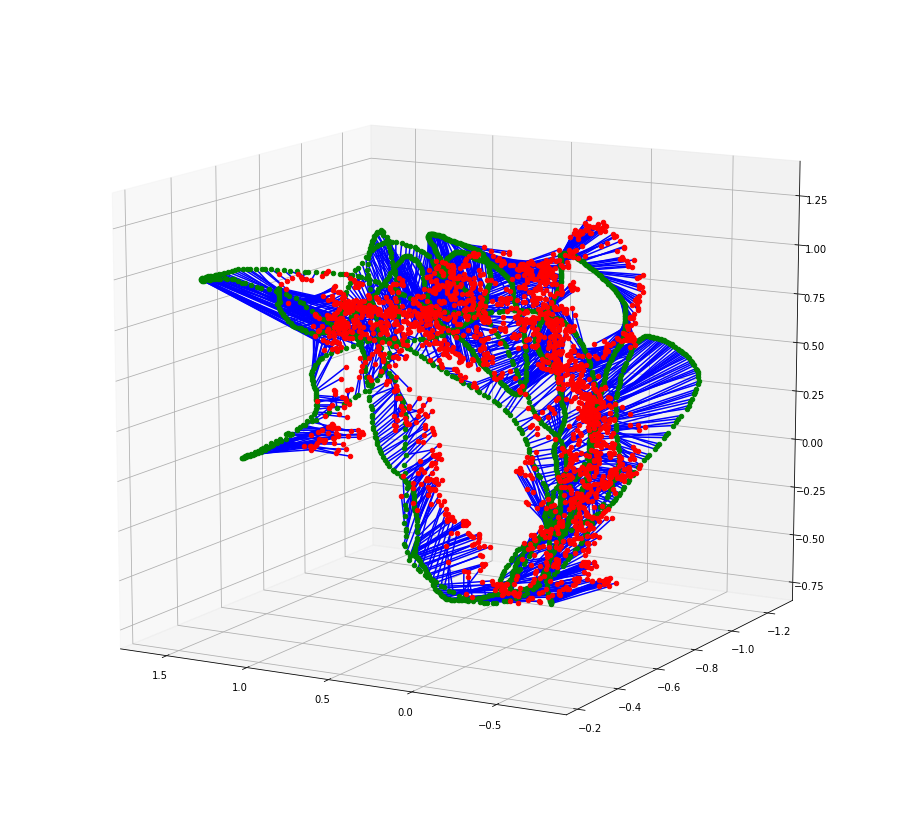

In [11]:
figure = plt.figure(figsize=(35, 15))
ax = figure.add_subplot(1, 2, 2, projection='3d')
ss = 1
pred_poses = predicted_trajectory
targ_poses = truth_trajectory
z = np.vstack((pred_poses[::ss, 2].T, targ_poses[::ss, 2].T))
x = np.vstack((pred_poses[::ss, 0].T, targ_poses[::ss, 0].T))
y = np.vstack((pred_poses[::ss, 1].T, targ_poses[::ss, 1].T))
for xx, yy, zz in zip(x.T, y.T, z.T):
    ax.plot(xx, yy, zs=zz, c='b')
ax.scatter(x[0, :], y[0, :], zs=z[0, :], c='r', depthshade=0)
ax.scatter(x[1, :], y[1, :], zs=z[1, :], c='g', depthshade=0)
ax.view_init(azim=119, elev=13)

In [12]:
np.median(np.linalg.norm(pred_poses - targ_poses, axis=1))

0.5474592355124048

In [26]:
def qexp(q):
    """
    Applies the exponential map to q
    :param q: (3,)
    :return: (4,)
    """
    n = np.linalg.norm(q)
    q = np.hstack((np.cos(n), np.sinc(n/np.pi)*q))
    return q

In [24]:
def quaternion_angular_error(q1, q2):
    """
    angular error between two quaternions
    :param q1: (4, )
    :param q2: (4, )
    :return:
    """
    d = abs(np.dot(q1, q2))
    d = min(1.0, max(-1.0, d))
    theta = 2 * np.arccos(d) * 180 / np.pi
    return theta